In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. tree import plot_tree

In [11]:
col_nam = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names = col_nam)
df.head(2)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [30]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [43]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head(2)

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_good,class_unacc,class_vgood
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [49]:
X = df_encoded.iloc[:, :-3]
y = df_encoded.iloc[:,-3:]

In [50]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [51]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train,y_train)

In [56]:
dt_clf.score(x_test,y_test)

0.9171483622350675

[Text(530.40515625, 788.22, 'safety_low <= 0.5\ngini = 0.187\nsamples = 1209\nvalue = [[1159, 50]\n[357, 852]\n[1168, 41]]'),
 Text(524.82515625, 733.86, 'persons_4 <= 0.5\ngini = 0.236\nsamples = 802\nvalue = [[752, 50]\n[357, 445]\n[761, 41]]'),
 Text(306.725625, 679.5, 'persons_more <= 0.5\ngini = 0.2\nsamples = 526\nvalue = [[503, 23]\n[172, 354]\n[505, 21]]'),
 Text(301.145625, 625.14, 'gini = 0.0\nsamples = 260\nvalue = [[260, 0]\n[0, 260]\n[260, 0]]'),
 Text(312.305625, 625.14, 'maint_vhigh <= 0.5\ngini = 0.253\nsamples = 266\nvalue = [[243, 23]\n[172, 94]\n[245, 21]]'),
 Text(206.11125, 570.78, 'lug_boot_small <= 0.5\ngini = 0.257\nsamples = 202\nvalue = [[179, 23]\n[150, 52]\n[181, 21]]'),
 Text(108.1125, 516.42, 'buying_vhigh <= 0.5\ngini = 0.238\nsamples = 130\nvalue = [[113, 17]\n[114, 16]\n[109, 21]]'),
 Text(65.565, 462.06, 'safety_med <= 0.5\ngini = 0.228\nsamples = 94\nvalue = [[77, 17]\n[92, 2]\n[73, 21]]'),
 Text(27.9, 407.7, 'buying_low <= 0.5\ngini = 0.193\nsamples 

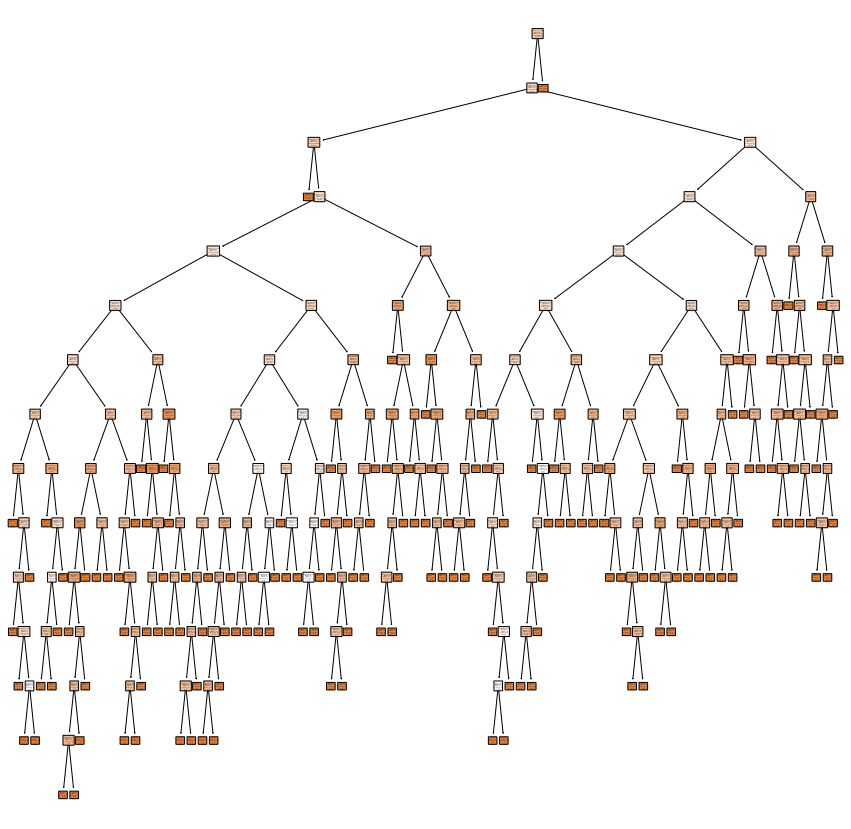

In [54]:
plt.figure(figsize = (15,15))
plot_tree(dt_clf,
filled = True,
rounded = True,
class_names = ['good','unacc','vgood'],
feature_names=df_encoded.columns)
